 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [450]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [451]:
# Reading whale returns
whale_returns_path = Path('/Users/luketarlinton/desktop/Jupiter-Workspace/Week-3-Assignment/Starter_Code/Resources/whale_returns.csv')
whale_returns = pd.read_csv(whale_returns_path)
whale_returns = whale_returns.set_index(pd.to_datetime(whale_returns["Date"], infer_datetime_format=True))

In [452]:
# Count nulls
whale_returns.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [453]:
# Drop nulls
whale_returns.dropna(inplace=True)
whale_returns.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [454]:
# Drop extra date column
whale_returns = whale_returns.drop(columns=["Date"])
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [455]:
# Reading algorithmic returns
algo_returns_path = Path('/Users/luketarlinton/desktop/Jupiter-Workspace/Week-3-Assignment/Starter_Code/Resources/algo_returns.csv')
algo_returns = pd.read_csv(algo_returns_path)
algo_returns = algo_returns.set_index(pd.to_datetime(algo_returns["Date"], infer_datetime_format=True))

In [456]:
# Count nulls
algo_returns.isnull().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [457]:
# Drop nulls
algo_returns.dropna(inplace=True)
algo_returns.isnull().sum()

Date      0
Algo 1    0
Algo 2    0
dtype: int64

In [458]:
# Drop extra date column
algo_returns = algo_returns.drop(columns=["Date"])
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [459]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_history_path = Path('/Users/luketarlinton/desktop/Jupiter-Workspace/Week-3-Assignment/Starter_Code/Resources/sp_tsx_history.csv')
sp_tsx_history = pd.read_csv(sp_tsx_history_path)
sp_tsx_history = sp_tsx_history.set_index(pd.to_datetime(sp_tsx_history["Date"], infer_datetime_format=True))

In [460]:
# Check Data Types
sp_tsx_history.dtypes

Date     object
Close    object
dtype: object

In [461]:
# Fix Data Types
sp_tsx_history.head()

,Date,Close
Date,,
2012-10-01,1-Oct-2012,"$12,370.19"
2012-10-02,2-Oct-2012,"$12,391.23"
2012-10-03,3-Oct-2012,"$12,359.47"
2012-10-04,4-Oct-2012,"$12,447.68"
2012-10-05,5-Oct-2012,"$12,418.99"


In [462]:
# Clear $ symbol and commas from the data in the 'Close' column
sp_tsx_history["Close"] = sp_tsx_history["Close"].str.replace("$", "")
sp_tsx_history["Close"] = sp_tsx_history["Close"].str.replace(",", "")

/Users/luketarlinton/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [463]:
# Update data type of the 'Close" column from object to float
sp_tsx_history["Close"] = sp_tsx_history["Close"].astype("float")

In [464]:
# Check data types
sp_tsx_history.dtypes

Date      object
Close    float64
dtype: object

In [465]:
# Display a summary of the data
sp_tsx_history.head()

,Date,Close
Date,,
2012-10-01,1-Oct-2012,12370.19
2012-10-02,2-Oct-2012,12391.23
2012-10-03,3-Oct-2012,12359.47
2012-10-04,4-Oct-2012,12447.68
2012-10-05,5-Oct-2012,12418.99


In [466]:
# Calculate Daily Returns
sp_tsx_history = sp_tsx_history.drop(columns=["Date"])
sp_tsx_history = (sp_tsx_history - sp_tsx_history.shift(1)) / sp_tsx_history.shift(1)
sp_tsx_history.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [467]:
# Drop nulls
sp_tsx_history.dropna(inplace=True)
sp_tsx_history.isnull().sum()

Close    0
dtype: int64

In [468]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_history = sp_tsx_history.rename(columns={
    "Close": "S&P TSX",})
sp_tsx_history

,S&P TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [469]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
joined_data = pd.concat([whale_returns,algo_returns,sp_tsx_history], axis="columns", join="inner")
joined_data

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

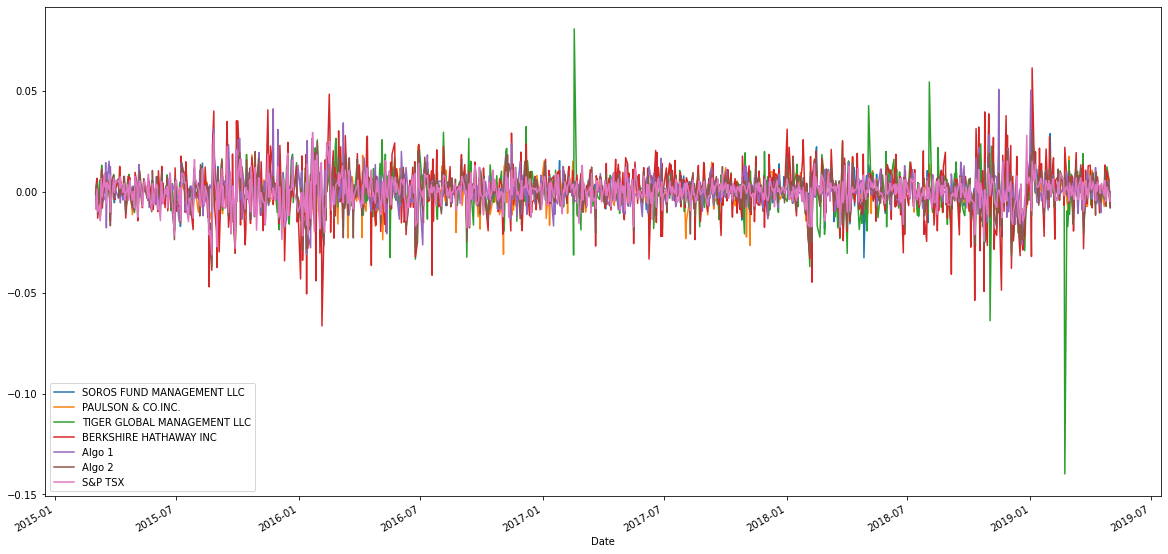

In [512]:
# Plot daily returns of all portfolios
joined_data.plot(figsize=(20, 10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

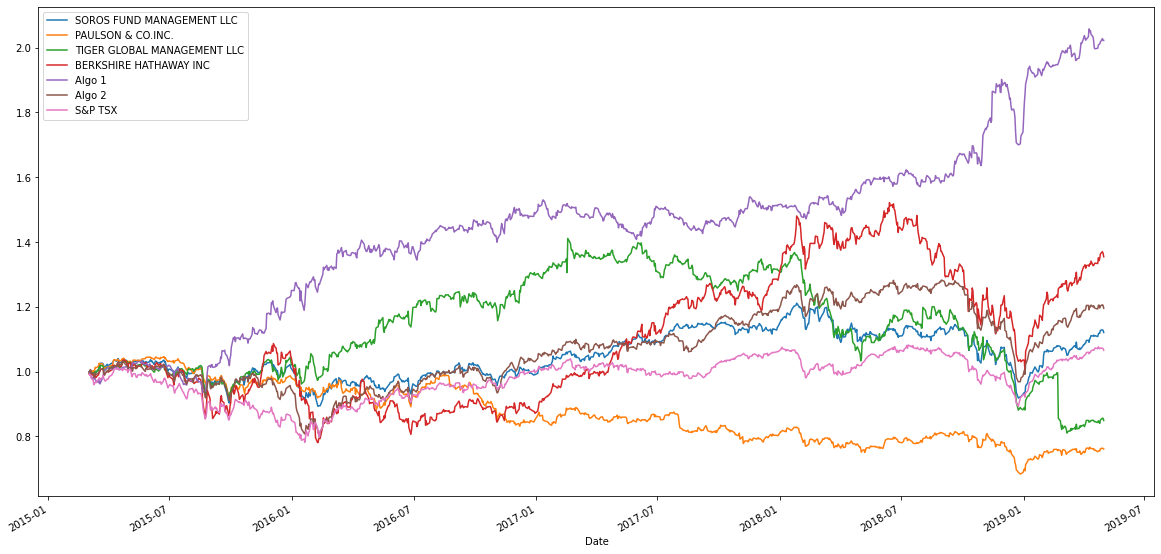

In [511]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + joined_data).cumprod()
cumulative_returns
# Plot cumulative returns
cumulative_returns.plot(figsize=(20, 10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

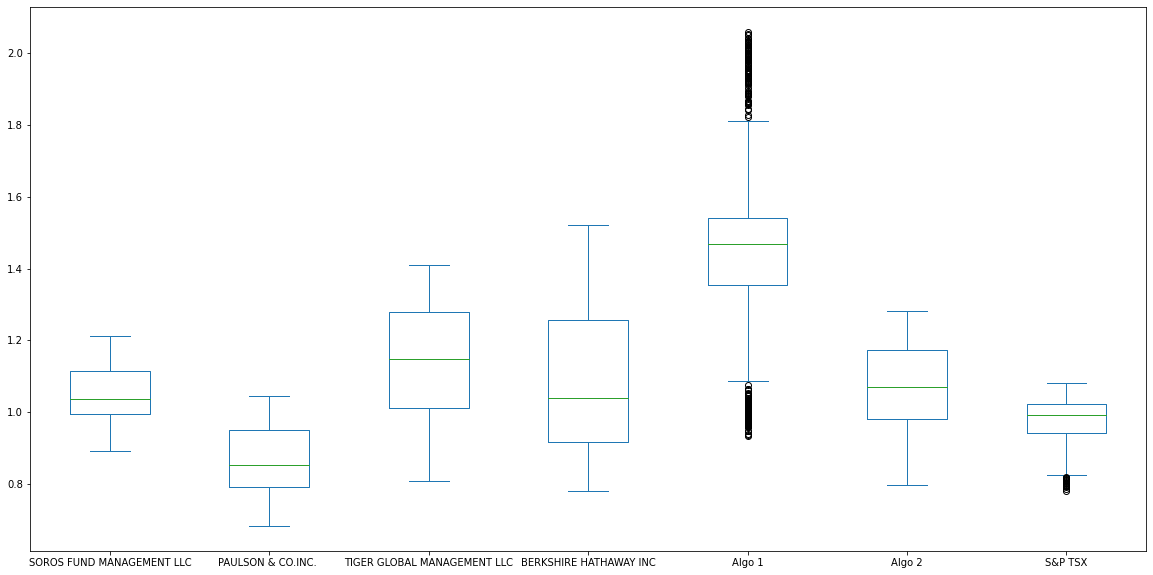

In [513]:
# Box plot to visually show risk
cumulative_returns.plot(kind="box",figsize=(20, 10))

### Calculate Standard Deviations

In [473]:
# Calculate the daily standard deviations of all portfolios
daily_std = joined_data.std()
daily_std

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P TSX                        0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [474]:
# Determine which portfolios are riskier than the S&P TSX 60
daily_std = daily_std.sort_values(ascending=False)
daily_std

BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
Algo 1                         0.007589
S&P TSX                        0.007034
PAULSON & CO.INC.              0.006982
dtype: float64

### Calculate the Annualized Standard Deviation

In [475]:
# Calculate the annualized standard deviation (252 trading days)
daily_std = joined_data.std()
annualized_std = daily_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P TSX                        0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

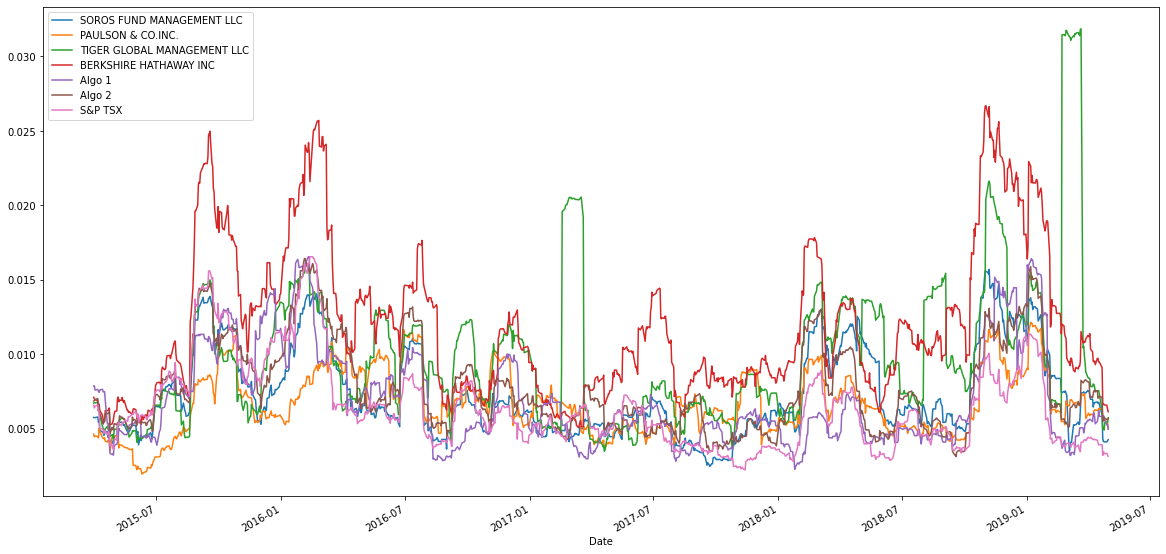

In [510]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
joined_data.rolling(window=21).std()
# Plot the rolling standard deviation
joined_data.rolling(window=21).std().plot(figsize=(20, 10))

### Calculate and plot the correlation

In [477]:
# Calculate the correlation and display the correlation matrix
joined_data.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


<AxesSubplot:>

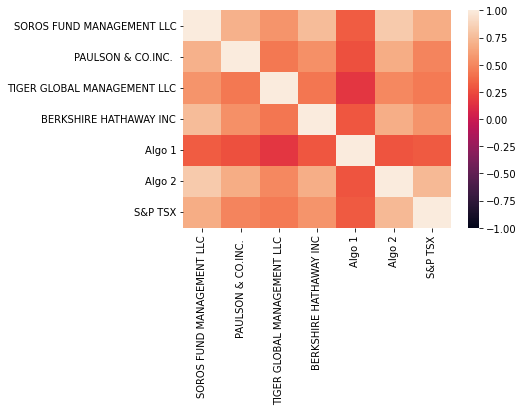

In [478]:
# Visualise the correlation in a heatmap
correlation = joined_data.corr()
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

3.7106899078552215e-05
4.947951591513087e-05
0.7499446668435351


<AxesSubplot:title={'center':'Rolling 21-Day Beta of SOROS FUND MANAGEMENT LLC'}, xlabel='Date'>

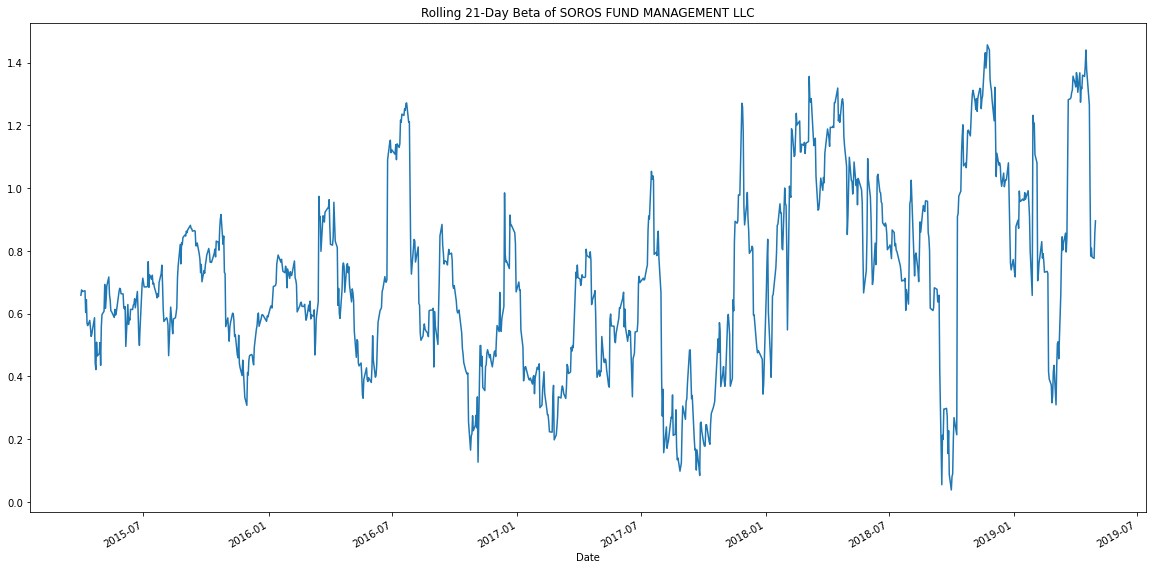

In [509]:
# Calculate covariance of a single portfolio
covariance = joined_data['SOROS FUND MANAGEMENT LLC'].cov(joined_data['S&P TSX'])
print(covariance)
# Calculate variance of S&P TSX
variance = joined_data['S&P TSX'].var()
print(variance)
# Computing beta
SOROS_beta = covariance / variance
print(SOROS_beta)
# Plot beta trend
rolling_covariance = joined_data['SOROS FUND MANAGEMENT LLC'].rolling(window=21).cov(joined_data['S&P TSX'])

rolling_variance = joined_data['S&P TSX'].rolling(window=21).var()

rolling_beta = rolling_covariance/ rolling_variance

rolling_beta.plot(figsize=(20, 10), title='Rolling 21-Day Beta of SOROS FUND MANAGEMENT LLC')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [480]:
# Use `ewm` to calculate the rolling window
joined_data.ewm(halflife=21).std()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.003648
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004162,0.002662,0.004936
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.003419,0.007166,0.005205
2015-03-09,0.004638,0.004471,0.005496,0.008066,0.002999,0.006290,0.004517
...,...,...,...,...,...,...,...
2019-04-25,0.006819,0.006342,0.014811,0.010830,0.006526,0.007500,0.004700
2019-04-26,0.006819,0.006448,0.014764,0.010763,0.006433,0.007418,0.004628
2019-04-29,0.006708,0.006357,0.014575,0.010601,0.006378,0.007304,0.004564


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [481]:
# Annualized Sharpe Ratios
sharpe_ratios = ((joined_data.mean()-joined_data['S&P TSX'].mean()) * 252) / (joined_data.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.110980
PAULSON & CO.INC.             -0.744596
TIGER GLOBAL MANAGEMENT LLC   -0.270851
BERKSHIRE HATHAWAY INC         0.359795
Algo 1                         1.310258
Algo 2                         0.231615
S&P TSX                        0.000000
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

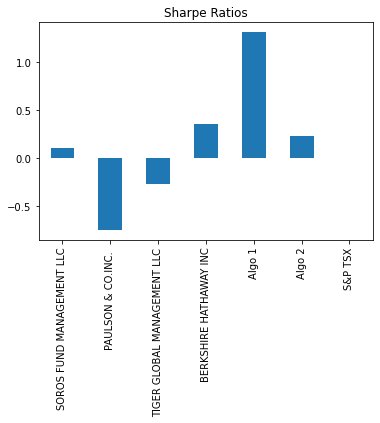

In [482]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

The Algorithmic Strategy 1 greatly outperforms the market (S&P TSX 60) and all of the whales portfolios this is displayed above using the Sharpe Ratio as it has a Sharpe Ratio of 1.310258. The next highest Sharpe Ratio out of all the funds is  0.359795 (Bershire Hathaway INC).
The Algorithmic Strategy 2 outperfroms the market (S&P TSX 60), outperfroms all of the whale's portfolios (only just outperforming the Soros Fund Management LLC fund) besides the Berkshire Hathaway INC fund (Sharpe Ratio of  0.359795) which has only meerly managed to outperform the Algorithmic Strategy 2 (Sharpe Ratio 0.231615.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [483]:
# Reading data from 1st stock
# Reset Date index
dvn_returns_path = Path('/Users/luketarlinton/desktop/Jupiter-Workspace/Week-3-Assignment/Google_Finance/Google Finance Investment Tracker - DVN.csv')
dvn_returns = pd.read_csv(dvn_returns_path)
dvn_returns = dvn_returns.set_index(pd.to_datetime(dvn_returns["Date"], infer_datetime_format=True))

In [484]:
# Reading data from 2nd stock
# Reset Date index
enph_returns_path = Path('/Users/luketarlinton/desktop/Jupiter-Workspace/Week-3-Assignment/Google_Finance/Google Finance Investment Tracker - ENPH.csv')
enph_returns = pd.read_csv(enph_returns_path)
enph_returns = enph_returns.set_index(pd.to_datetime(enph_returns["Date"], infer_datetime_format=True))

In [485]:
# Reading data from 3rd stock
# Reset Date index
nvda_returns_path = Path('/Users/luketarlinton/desktop/Jupiter-Workspace/Week-3-Assignment/Google_Finance/Google Finance Investment Tracker - NVDA.csv')
nvda_returns = pd.read_csv(nvda_returns_path)
nvda_returns = nvda_returns.set_index(pd.to_datetime(nvda_returns["Date"], infer_datetime_format=True))

In [486]:
# Combine all stocks in a single DataFrame
google_joined_data = pd.concat([dvn_returns,enph_returns,nvda_returns], axis="columns", join="inner")
google_joined_data

,Unnamed: 0,Date,Close_1,Unnamed: 0,Date,Close_2,Unnamed: 0,Date,Close_3
Date,,,,,,,,,
2018-06-05,NaN,"Jun 5, 18",25.48,NaN,"Jun 5, 18",15.92,NaN,"Jun 5, 18",35.32
2018-06-06,NaN,"Jun 6, 18",25.63,NaN,"Jun 6, 18",15.68,NaN,"Jun 6, 18",35.95
2018-06-07,NaN,2018-06-07,25.69,NaN,2018-06-07,16.36,NaN,"Jun 7, 18",36.38
2018-06-11,NaN,2018-06-11,26.10,NaN,2018-06-11,17.07,NaN,"Jun 11, 18",37.69
2018-06-12,NaN,2018-06-12,25.48,NaN,2018-06-12,17.08,NaN,"Jun 12, 18",36.55
...,...,...,...,...,...,...,...,...,...
2022-05-27,NaN,"May 27, 2022",75.80,NaN,"May 27, 2022",188.95,NaN,"May 27, 2022",188.11
2022-05-31,NaN,"May 31, 2022",74.90,NaN,"May 31, 2022",186.19,NaN,"May 31, 2022",186.72
2022-06-01,NaN,"Jun 1, 2022",76.48,NaN,"Jun 1, 2022",182.49,NaN,"Jun 1, 2022",183.20


In [487]:
# Reorganize portfolio data by having a column per symbol
google_joined_data = google_joined_data.drop(columns=["Date"])
google_joined_data = google_joined_data.drop(columns=["Unnamed: 0"])
google_joined_data

,Close_1,Close_2,Close_3
Date,,,
2018-06-05,25.48,15.92,35.32
2018-06-06,25.63,15.68,35.95
2018-06-07,25.69,16.36,36.38
2018-06-11,26.10,17.07,37.69
2018-06-12,25.48,17.08,36.55
...,...,...,...
2022-05-27,75.80,188.95,188.11
2022-05-31,74.90,186.19,186.72
2022-06-01,76.48,182.49,183.20


In [488]:
# Rename the columns 
google_joined_data = google_joined_data.rename(columns = {'Close_1':'DVN', 'Close_2':'ENPH','Close_3':'NVDA'},)
google_joined_data

,DVN,ENPH,NVDA
Date,,,
2018-06-05,25.48,15.92,35.32
2018-06-06,25.63,15.68,35.95
2018-06-07,25.69,16.36,36.38
2018-06-11,26.10,17.07,37.69
2018-06-12,25.48,17.08,36.55
...,...,...,...
2022-05-27,75.80,188.95,188.11
2022-05-31,74.90,186.19,186.72
2022-06-01,76.48,182.49,183.20


In [489]:
# Calculate daily returns
daily_returns_1 = (google_joined_data - google_joined_data.shift(1)) / google_joined_data.shift(1)
# Drop NAs
daily_returns_1 = daily_returns.dropna().copy()
# Display sample data
daily_returns_1

,DVN,ENPH,NVDA
Date,,,
2018-06-06,0.005887,-0.015075,0.017837
2018-06-07,0.002341,0.043367,0.011961
2018-06-11,0.015960,0.043399,0.036009
2018-06-12,-0.023755,0.000586,-0.030247
2018-06-13,0.025118,0.025176,0.014227
...,...,...,...
2022-05-27,0.026961,0.056886,0.053778
2022-05-31,-0.011873,-0.014607,-0.007389
2022-06-01,0.021095,-0.019872,-0.018852


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [490]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

portfolio_returns_1 = daily_returns.dot(weights)

# Display sample data

portfolio_returns_1

Date
2018-06-06    0.002883
2018-06-07    0.019223
2018-06-11    0.031789
2018-06-12   -0.017805
2018-06-13    0.021507
                ...   
2022-05-27    0.045875
2022-05-31   -0.011290
2022-06-01   -0.005876
2022-06-02    0.052432
2022-06-03   -0.016074
Length: 724, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [491]:
# Join your returns DataFrame to the original returns DataFrame
overall_joined_data = pd.concat([portfolio_returns_1,joined_data], axis="columns", join="inner")
overall_joined_data

,0,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,,
2018-06-06,0.002883,0.010718,0.009915,0.004335,0.010587,-0.009100,0.004958,0.003826
2018-06-07,0.019223,-0.000923,0.009195,-0.002086,-0.013634,0.008275,-0.002455,0.000547
2018-06-11,0.031789,0.005265,0.004534,0.016131,-0.000609,-0.000741,0.001700,0.003740
2018-06-12,-0.017805,0.004978,0.000431,0.002966,0.011773,0.000267,0.001419,0.001580
2018-06-13,0.021507,-0.006118,-0.000856,-0.002115,-0.007563,0.003277,-0.004322,-0.001422
...,...,...,...,...,...,...,...,...
2018-12-19,0.014547,-0.016731,-0.021254,-0.020559,-0.015881,-0.010074,-0.014650,-0.010601
2018-12-20,0.013874,-0.016673,-0.008347,-0.011045,-0.025463,-0.026095,-0.023793,-0.008573
2018-12-24,0.024779,-0.019152,-0.011786,-0.029165,-0.020181,-0.003938,-0.014745,-0.011141


In [492]:
# Rename the first column
overall_joined_data = overall_joined_data.rename(columns = {0:'Luke Fund LLC'},)
overall_joined_data

,Luke Fund LLC,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,,
2018-06-06,0.002883,0.010718,0.009915,0.004335,0.010587,-0.009100,0.004958,0.003826
2018-06-07,0.019223,-0.000923,0.009195,-0.002086,-0.013634,0.008275,-0.002455,0.000547
2018-06-11,0.031789,0.005265,0.004534,0.016131,-0.000609,-0.000741,0.001700,0.003740
2018-06-12,-0.017805,0.004978,0.000431,0.002966,0.011773,0.000267,0.001419,0.001580
2018-06-13,0.021507,-0.006118,-0.000856,-0.002115,-0.007563,0.003277,-0.004322,-0.001422
...,...,...,...,...,...,...,...,...
2018-12-19,0.014547,-0.016731,-0.021254,-0.020559,-0.015881,-0.010074,-0.014650,-0.010601
2018-12-20,0.013874,-0.016673,-0.008347,-0.011045,-0.025463,-0.026095,-0.023793,-0.008573
2018-12-24,0.024779,-0.019152,-0.011786,-0.029165,-0.020181,-0.003938,-0.014745,-0.011141


In [493]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
overall_joined_data.isnull().sum()

Luke Fund LLC                  0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P TSX                        0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [500]:
# Calculate the annualized `std`
daily_std_overall = overall_joined_data.std()
annualized_std_overall = daily_std_overall * np.sqrt(252)
annualized_std_overall

Luke Fund LLC                  0.408217
SOROS FUND MANAGEMENT LLC      0.157669
PAULSON & CO.INC.              0.118926
TIGER GLOBAL MANAGEMENT LLC    0.167211
BERKSHIRE HATHAWAY INC         0.277561
Algo 1                         0.150323
Algo 2                         0.147013
S&P TSX                        0.116887
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

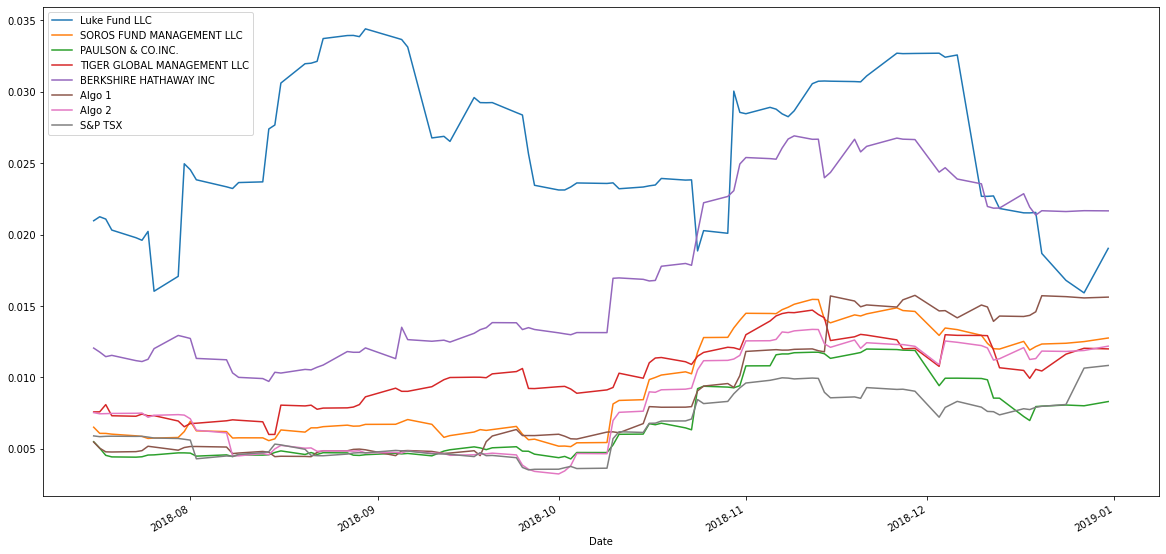

In [514]:
# Calculate rolling standard deviation
overall_joined_data.rolling(window=21).std()
# Plot the rolling standard deviation
overall_joined_data.rolling(window=21).std().plot(figsize=(20, 10))

### Calculate and plot the correlation

<AxesSubplot:>

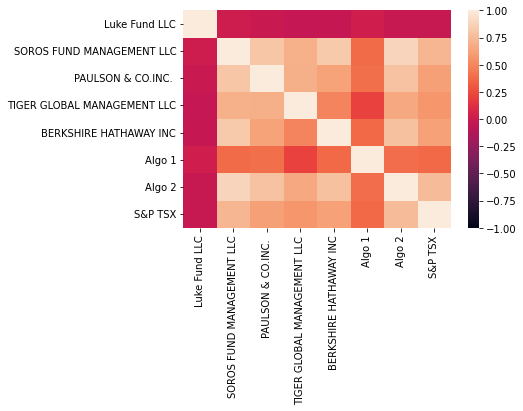

In [497]:
# Calculate and plot the correlation
overall_joined_data.corr()
correlation_overall = overall_joined_data.corr()
sns.heatmap(correlation_overall, vmin=-1, vmax=1)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 60-Day Beta of Luke Fund LLC'}, xlabel='Date'>

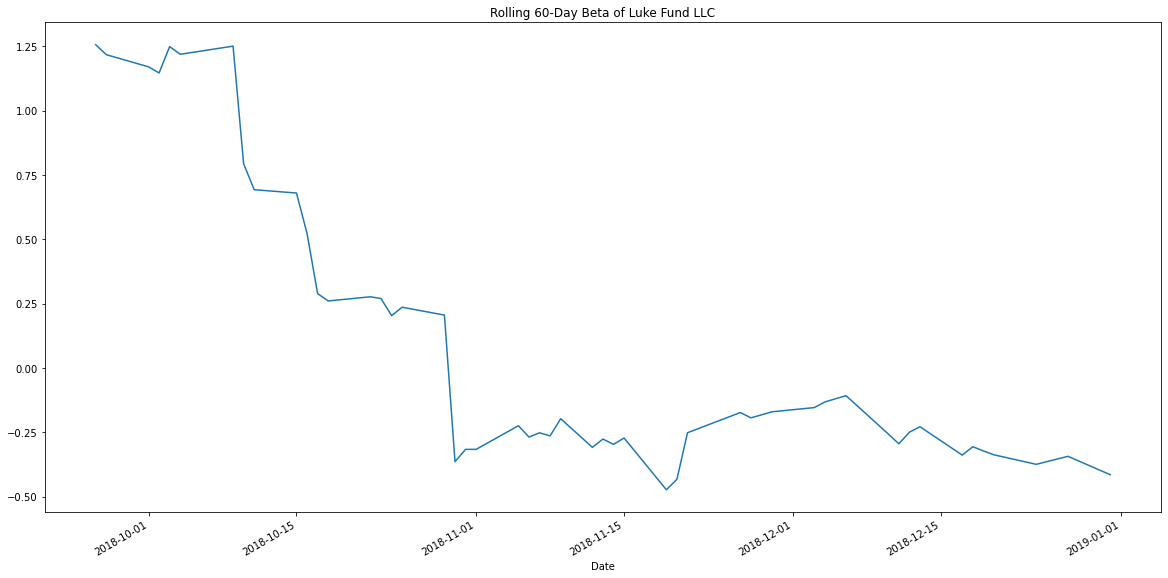

In [506]:
# Calculate and plot Beta
rolling_covariance_overall = overall_joined_data['Luke Fund LLC'].rolling(window=60).cov(overall_joined_data['S&P TSX'])

rolling_variance_overall = overall_joined_data['S&P TSX'].rolling(window=60).var()

rolling_beta_overall = rolling_covariance_overall / rolling_variance_overall

rolling_beta_overall.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Luke Fund LLC')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [507]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios_overall = ((overall_joined_data.mean()-overall_joined_data['S&P TSX'].mean()) * 252) / (overall_joined_data.std() * np.sqrt(252))
sharpe_ratios_overall

Luke Fund LLC                  3.297037
SOROS FUND MANAGEMENT LLC     -0.280948
PAULSON & CO.INC.              0.277996
TIGER GLOBAL MANAGEMENT LLC   -0.965391
BERKSHIRE HATHAWAY INC        -1.067818
Algo 1                         3.627247
Algo 2                        -1.639953
S&P TSX                        0.000000
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

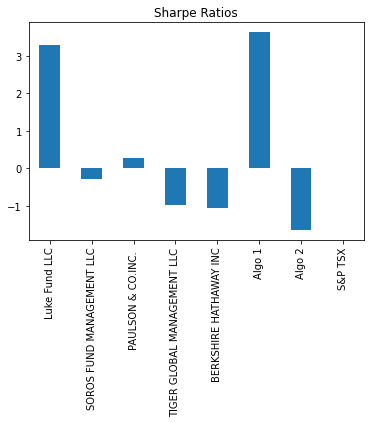

In [508]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_overall.plot(kind="bar", title="Sharpe Ratios")

### How does your portfolio do?

My fund (Luke Fund LLC) has outperfromed all other funds besides the Algorithmic Strategy 1, which has just slightly outperformed my fund.
This is reflected in the above bar plot which visualises the Sharpe Ratios of each fund.
My fund had a Sharpe Ratio of 3.297037 whereas the Algorithmic Strategy 1 had a Sharpe Ratio of 3.627247.